In [118]:
import matplotlib.pyplot as plt
import random
from itertools import combinations
import numpy as np

Prerequisite

In [6]:
li = list(zip(range(0, 51), range(0, 51)))
print(li[0])
print(li[-1])

(0, 0)
(50, 50)


In [10]:
# Unzip a Sequence
x, y = zip(*li)

print(x)
print(y)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)


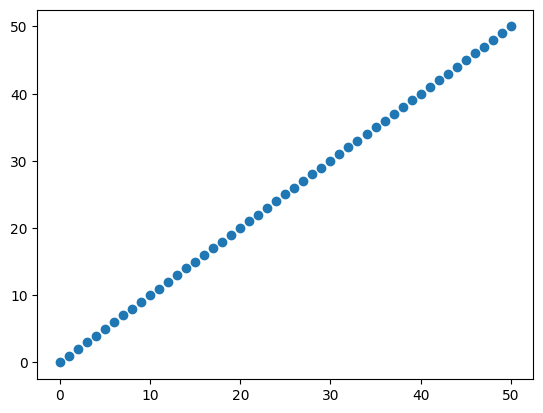

In [11]:
plt.scatter(x, y)
# or plt.scatter(*zip(*li))

In [82]:
letters ="GeEK"
 
# size of combination is set to 3
a = combinations(letters, 2)
print(a)

y = [' '.join(i) for i in a]
 
print(y)

['G e', 'G E', 'G K', 'e E', 'e K', 'E K']


Start from here

Randomly find 4 points within the range, the last point is the hub

In [57]:
max_range = 50
min_range = 2
num_dest = 3
points = []
for i in range(num_dest+1):
    points.append((random.randint(min_range,max_range+1), random.randint(min_range,max_range+1)))
print(points)

[(8, 44), (17, 34), (27, 3), (3, 10)]


In [101]:
x, y = zip(*points)
print(x)
print(y)

(8, 17, 27, 3)
(44, 34, 3, 10)


In [102]:
d = ['1', '2']
d.append('b')
d

['1', '2', 'b']

Plot it and differentiate the destinations from the hub

(0.0, 52.0)

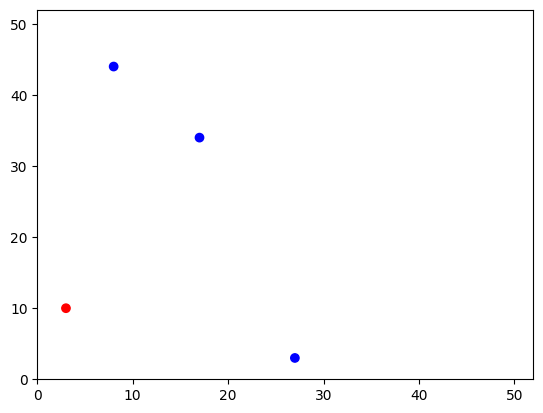

In [103]:
color = ['b' for i in range(num_dest)] # destinations
color.append('red') # hub

plt.scatter(x = x, y = y, c = color)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Draw all possible paths

(0.0, 52.0)

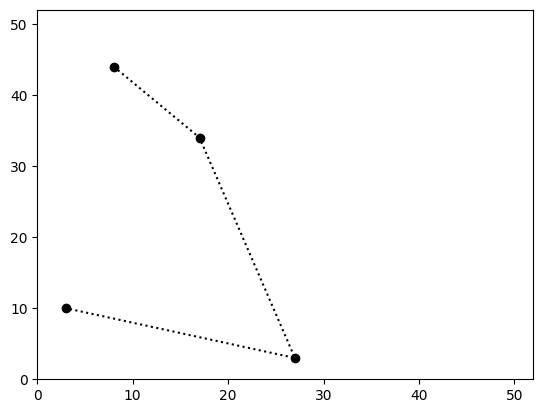

In [105]:
# [WRONG] 
plt.plot(list(x), list(y), linestyle=':',color='black',marker='o')
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

In [106]:
# [CORRECT] 
a = combinations(points, 2)
points_combination = [i for i in a]
points_combination

[((8, 44), (17, 34)),
 ((8, 44), (27, 3)),
 ((8, 44), (3, 10)),
 ((17, 34), (27, 3)),
 ((17, 34), (3, 10)),
 ((27, 3), (3, 10))]

(0.0, 52.0)

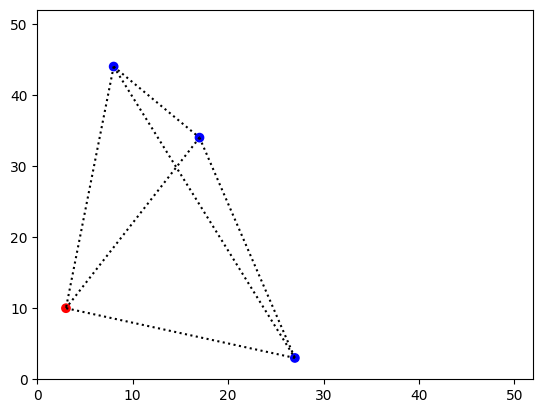

In [117]:
for point in points_combination:
    x_comb, y_comb = zip(*point)
    plt.plot(list(x_comb), list(y_comb), linestyle=':',color='black',marker=None)

# color points
plt.scatter(x = x, y = y, c = color, alpha=1.0)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Calculate the distances of all possible paths

In [119]:
x

(8, 17, 27, 3)

In [120]:
y

(44, 34, 3, 10)

In [121]:
points

[(8, 44), (17, 34), (27, 3), (3, 10)]

In [122]:
points_combination

[((8, 44), (17, 34)),
 ((8, 44), (27, 3)),
 ((8, 44), (3, 10)),
 ((17, 34), (27, 3)),
 ((17, 34), (3, 10)),
 ((27, 3), (3, 10))]

In [125]:
points_comb_dist = []
for i in points_combination:
    point_a = np.array(i[0])
    point_b = np.array(i[1])
    dist = np.linalg.norm(point_a - point_b)
    points_comb_dist.append(dist)
print(points_comb_dist)

[13.45362404707371, 45.18849411078001, 34.36568055487916, 32.57299494980466, 27.784887978899608, 25.0]


Plot the distance values next to the lines

(0.0, 52.0)

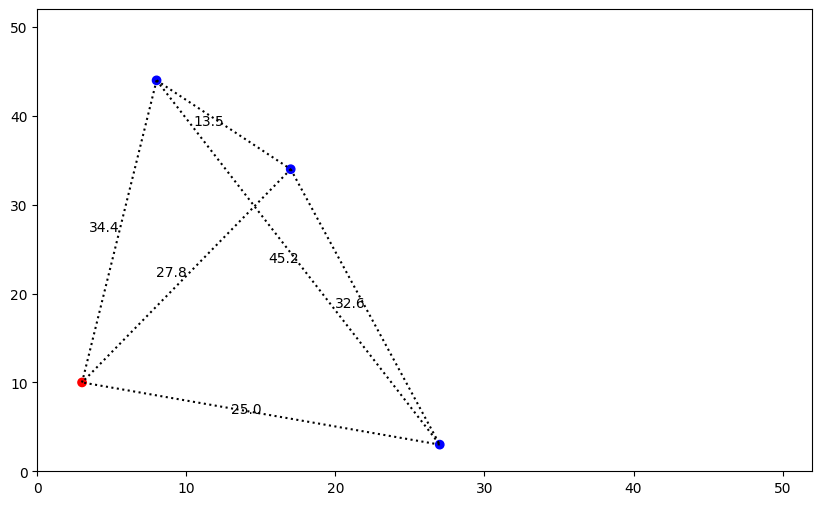

In [135]:
fig, ax = plt.subplots(figsize=(10,6))

for point in points_combination:
    x_comb, y_comb = zip(*point)
    plt.plot(list(x_comb), list(y_comb), linestyle=':',color='black',marker=None)
    
    point_a = np.array(point[0])
    point_b = np.array(point[1])
    dist = np.linalg.norm(point_a - point_b)
    
    loc_mid_line = (sum(x_comb)/2, sum(y_comb)/2)
    ax.text(loc_mid_line[0]-1, loc_mid_line[1], str(round(dist,1)), ha = 'center')

plt.scatter(x = x, y = y, c = color, alpha=1.0)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])



For only 3 destinations with 1 vehicle, it's probably easy to spot the shortest route by manual examining. 

How to pragmatically find the shortest route, even though there are 50 destinations? (step 1) and more than 1 vehicle? (step 2)